<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

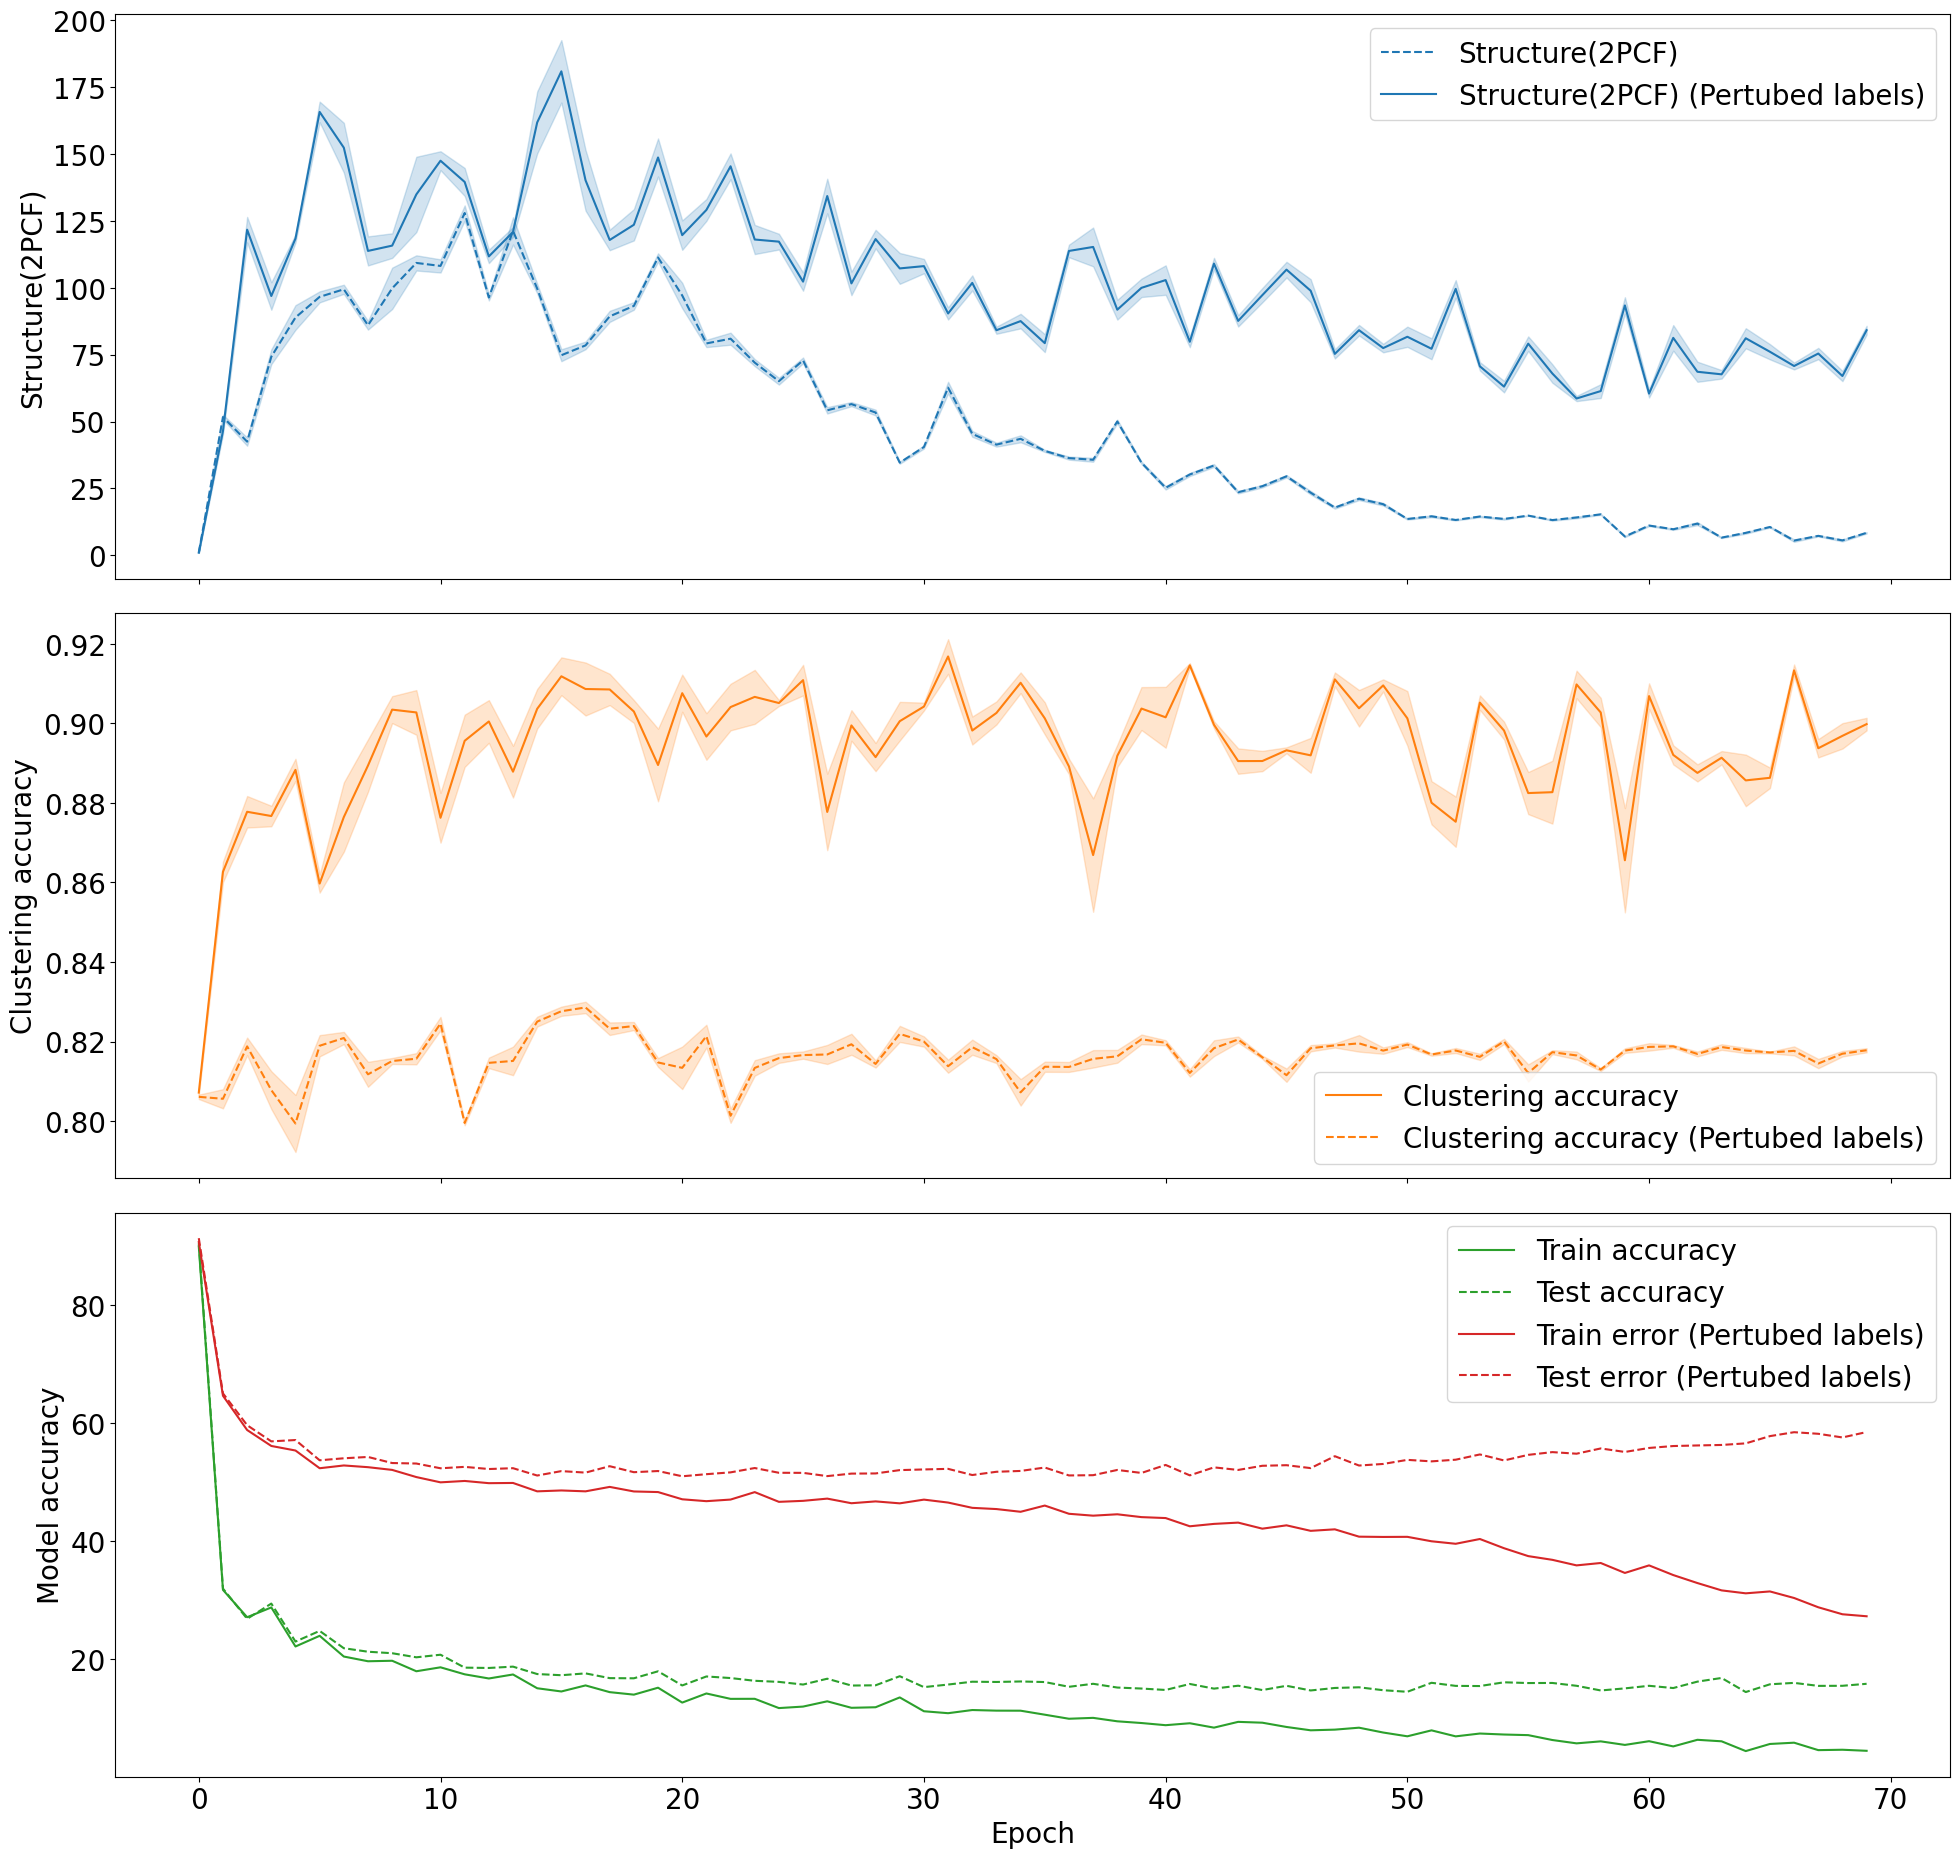

In [4]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(20, 20))

pkl_filename = "reply_pca_chi_validation.csv"
with open(pkl_filename, 'rb') as file:
    test = pickle.load(file)
                
pkl_filename = "reply_pca_chi_train.csv"
with open(pkl_filename, 'rb') as file:
    train = pickle.load(file)

pkl_filename = "bad_reply_pca_chi_validation.csv"
with open(pkl_filename, 'rb') as file:
    bad_test = pickle.load(file)
                
pkl_filename = "bad_reply_pca_chi_train.csv"
with open(pkl_filename, 'rb') as file:
    bad_train = pickle.load(file)



pkl_filename = "plots/bad_norm_scores.csv"
with open(pkl_filename, 'rb') as file:
        bad_norm_scores = pickle.load(file)

pkl_filename = "plots/bad_k_scores.csv"
with open(pkl_filename, 'rb') as file:
        bad_k_scores = pickle.load(file)


pkl_filename = "plots/good_norm_scores.csv"
with open(pkl_filename, 'rb') as file:
        good_norm_scores = pickle.load(file)

pkl_filename = "plots/good_k_scores.csv"
with open(pkl_filename, 'rb') as file:
        good_k_scores = pickle.load(file)


    


x = range(len(bad_norm_scores))
yerr = np.array([b for a,b in bad_norm_scores])
y = np.array([a-100 for a,b in  bad_norm_scores])

x = range(len(good_norm_scores))
yerr = np.array([b for a,b in good_norm_scores])
y_g = np.array([a-100 for a,b in  good_norm_scores])
#plt.plot(x, y,color = "blue",marker = "o",alpha = 0.3)

#plt.errorbar(x, y, yerr = yerr, color = "blue",alpha = 1)

axs[0].plot(x, y,color = "C0",alpha = 1,label='Structure(2PCF)',linestyle = "--")

axs[0].fill_between(x, [a-b/2-100 for a,b in bad_norm_scores] ,[a+b/2-100 for a,b in bad_norm_scores], color = "C0",alpha = 0.2)

axs[0].plot(x, y_g,color = "C0",alpha = 1,label='Structure(2PCF) (Pertubed labels)')

axs[0].fill_between(x, [a-b/2-100 for a,b in good_norm_scores] ,[a+b/2-100 for a,b in good_norm_scores], color = "C0",alpha = 0.2)



axs[0].set_ylabel('Structure(2PCF)')
axs[0].legend()
axs[1].plot(x, [a for a,b in good_k_scores],color = "C1",alpha = 1,label='Clustering accuracy')
axs[1].fill_between(x, [a-b/2 for a,b in good_k_scores] ,[a+b/2 for a,b in good_k_scores], color = "C1",alpha = 0.2)
axs[1].plot(x, [a for a,b in bad_k_scores],color = "C1",linestyle = "--",alpha = 1,label='Clustering accuracy (Pertubed labels)')
axs[1].fill_between(x, [a-b/2 for a,b in bad_k_scores] ,[a+b/2 for a,b in bad_k_scores], color = "C1",alpha = 0.2)




axs[1].set_ylabel('Clustering accuracy')
axs[1].legend()


axs[2].plot(x,[100-a for a in train[:len(bad_norm_scores)]],alpha = 1,label='Train accuracy', color = "C2")
axs[2].plot(x,[100-a for a in test[:len(bad_norm_scores)]], linestyle = "--",alpha = 1,label='Test accuracy', color = "C2")

axs[2].plot(x,[100-a for a in bad_train[:len(bad_norm_scores)]],alpha = 1,label='Train error (Pertubed labels)', color = "C3")
axs[2].plot(x,[100-a for a in bad_test[:len(bad_norm_scores)]], linestyle = "--",alpha = 1,label='Test error (Pertubed labels)', color = "C3")


axs[2].set_ylabel('Model accuracy')
axs[2].set_xlabel('Epoch')
axs[2].legend()

# Add a global title
#fig.suptitle('Stacked Subplots with Shared X-axis', fontsize=16)
# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()

/users/koketso/.venv/deepclustering3/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Saved :  Umap on UMAP.csv
UMAP reduced in  47.40449380874634


<Figure size 1920x1440 with 0 Axes>

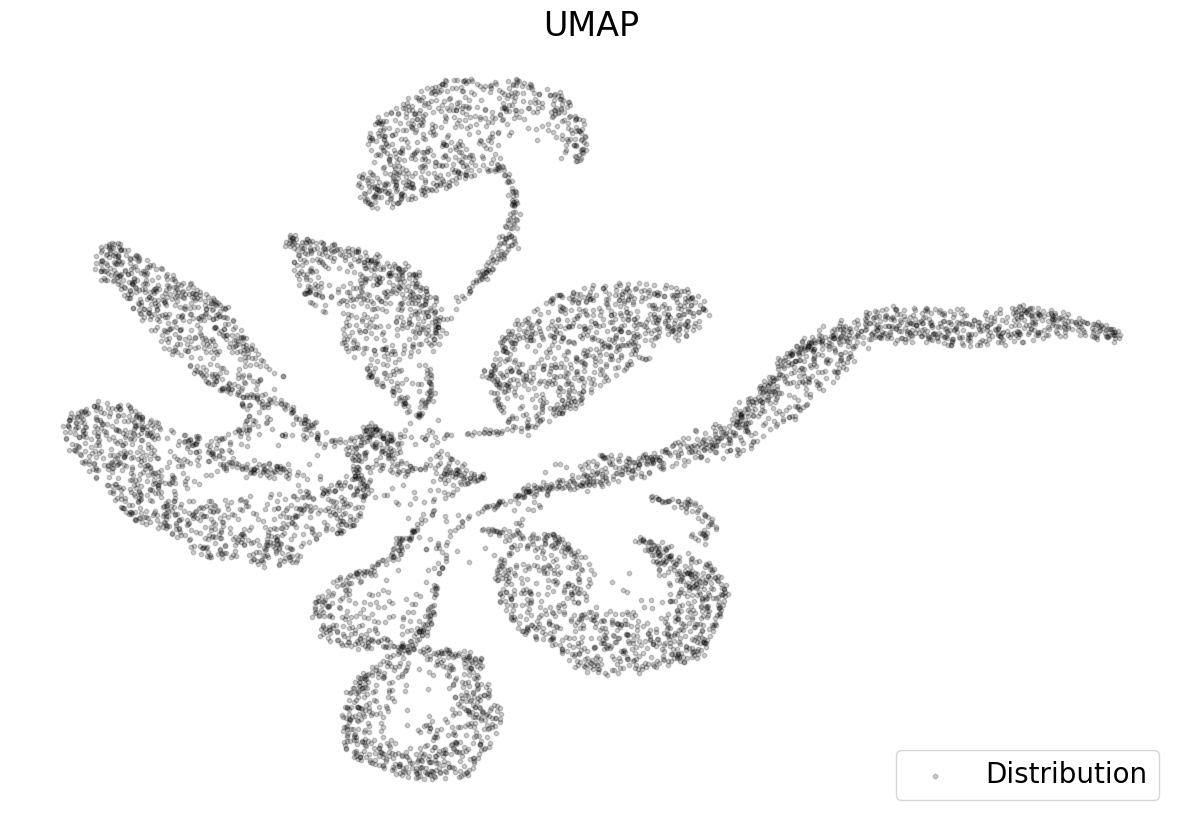

Plotting


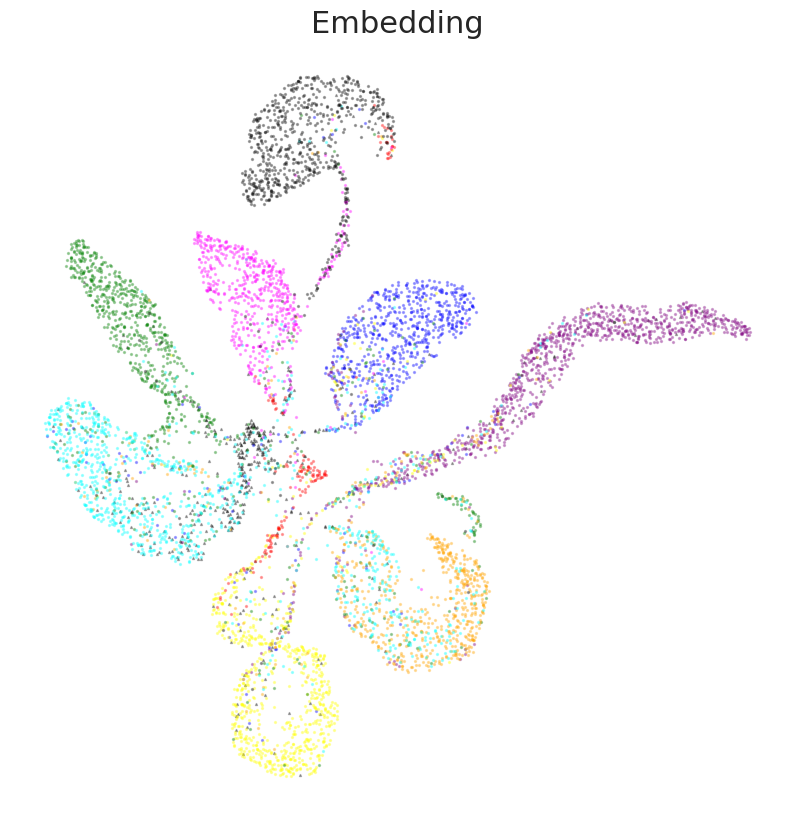

/users/koketso/.venv/deepclustering3/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Saved :  Umap on UMAP.csv
UMAP reduced in  23.250110149383545


<Figure size 1920x1440 with 0 Axes>

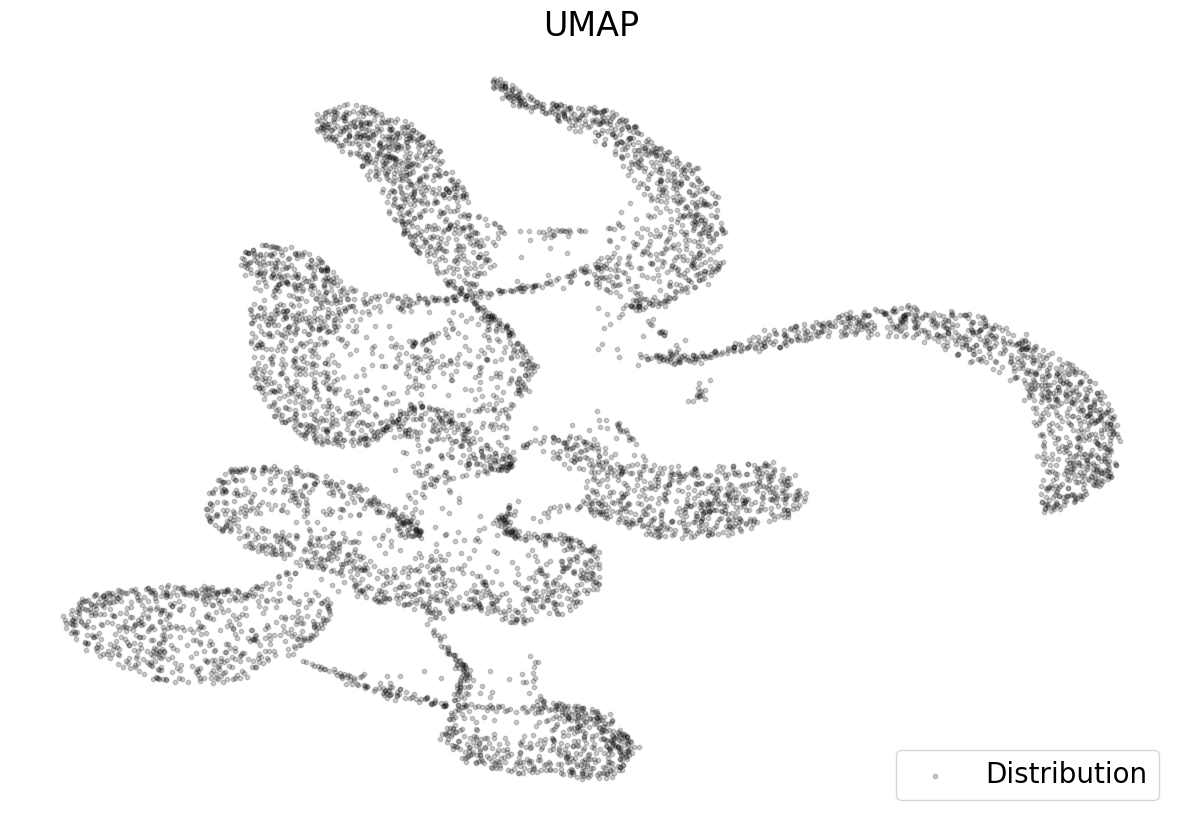

Plotting


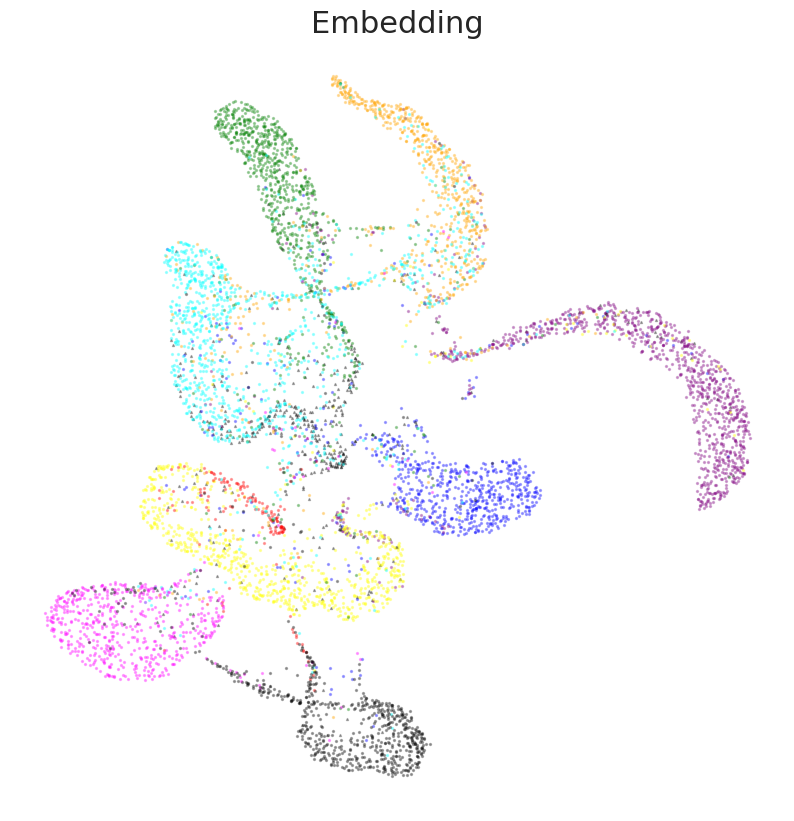

In [2]:
import backbone.VISUAL as viz
import pickle

epoch = 6
pkl_filename = "plots/test_representations"+str(epoch)+".csv"
with open(pkl_filename, 'rb') as file:
        val_flat= pickle.load(file)



pkl_filename = "plots/test_labels"+str(epoch)+".csv"
with open(pkl_filename, 'rb') as file:
        val_labels= pickle.load(file)
        

    
   


val_flat_umap = viz.umap(val_flat,
                            scatter = True,
                            name = "UMAP", 
                            dim = 2, 
                            min_dist = 0.8,
                            n_neighbors = 50,
                            random_state = 42,
                            alpha = 0.2)

viz.shade(val_flat_umap,val_labels,numof_class = 10,alpha = 0.3,hard_coloring = True,)


epoch = 7
pkl_filename = "plots/test_representations"+str(epoch)+".csv"
with open(pkl_filename, 'rb') as file:
        val_flat= pickle.load(file)



pkl_filename = "plots/test_labels"+str(epoch)+".csv"
with open(pkl_filename, 'rb') as file:
        val_labels= pickle.load(file)
        

    
   


val_flat_umap = viz.umap(val_flat,
                            scatter = True,
                            name = "UMAP", 
                            dim = 2, 
                            min_dist = 0.8,
                            n_neighbors = 50,
                            random_state = 42,
                            alpha = 0.2)

viz.shade(val_flat_umap,val_labels,numof_class = 10,alpha = 0.3,hard_coloring = True,)

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

pkl_filename = "intrinsic_dimension.csv"
with open(pkl_filename, 'rb') as file:
    i_d= pickle.load(file)
        
pkl_filename = "validation.csv"
with open(pkl_filename, 'rb') as file:
    validation_accuracy = pickle.load(file) 

pkl_filename = "train.csv"
with open(pkl_filename, 'rb') as file:
    train_accuracy = pickle.load(file) 

y,yerr = zip(*i_d)
x = range(len(y))
yerr = np.array(yerr)
y = np.array(y)
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
plt.plot(y, label = "ID score", color = "blue")
plt.fill_between(x, y - yerr, y + yerr, color="blue", alpha=0.3)

plt.plot([(100-a)/5 for a in validation_accuracy], label = "Validation error/5")
plt.plot([(100-a)/5 for a in train_accuracy], label = "Train error/5")
plt.xlabel("Epoch")
plt.ylim(0,20)

plt.legend(loc="upper right")
plt.show()

NameError: name 'viz' is not defined